<a href="https://colab.research.google.com/github/joromarxx/machine_learning/blob/master/Ejercicio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
   https://www.dropbox.com/s/sshnskxxolkrq9h/cats_and_dogs_small.zip?dl=0\
   -O /tmp/cats_and_dogs_small.zip

--2020-04-23 21:15:10--  https://www.dropbox.com/s/sshnskxxolkrq9h/cats_and_dogs_small.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/sshnskxxolkrq9h/cats_and_dogs_small.zip [following]
--2020-04-23 21:15:10--  https://www.dropbox.com/s/raw/sshnskxxolkrq9h/cats_and_dogs_small.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucea176b4be911b8c46f0d570bd2.dl.dropboxusercontent.com/cd/0/inline/A2Z1PHj6CnyudlZvohsNUH9M1TNBn0CAdyOmlu1otZ2GRjfBVubRnWet-DecV31FsuWmQk4Gd9iMAxQqtuCtf6BshgDaYMf6XaUdQYLlNkUB1BPnsJLK9Larcppa-7OFZok/file# [following]
--2020-04-23 21:15:10--  https://ucea176b4be911b8c46f0d570bd2.dl.dropboxusercontent.com/cd/0/inline/A2Z1PHj6CnyudlZvohsNUH9M1TNBn0CAdyOmlu1otZ2GRjfBVubRnWet-DecV31FsuWmQk4Gd9iM

In [0]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_small.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_small'

train_dir =      os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir =       os.path.join(base_dir, 'test')

# Directorio con las imagenes de training
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directorio con las imagenes de validation
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Directorio con las imagenes de test
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [4]:
train_cat_fnames = os.listdir( train_cats_dir )
print(train_cat_fnames[:5])

train_dog_fnames = os.listdir( train_dogs_dir )
print(train_dog_fnames[:5])

validation_cat_fnames = os.listdir( validation_cats_dir )
print(validation_cat_fnames[:5])

validation_dog_fnames = os.listdir( validation_dogs_dir )
print(validation_dog_fnames[:5])

test_cat_fnames = os.listdir( test_cats_dir )
print(test_cat_fnames[:5])

test_dog_fnames = os.listdir( test_dogs_dir )
print(test_dog_fnames[:5])

['cat.364.jpg', 'cat.607.jpg', 'cat.247.jpg', 'cat.316.jpg', 'cat.19.jpg']
['dog.118.jpg', 'dog.882.jpg', 'dog.643.jpg', 'dog.108.jpg', 'dog.54.jpg']
['cat.1284.jpg', 'cat.1288.jpg', 'cat.1372.jpg', 'cat.1430.jpg', 'cat.1496.jpg']
['dog.1025.jpg', 'dog.1486.jpg', 'dog.1438.jpg', 'dog.1460.jpg', 'dog.1390.jpg']
['cat.1586.jpg', 'cat.1501.jpg', 'cat.1592.jpg', 'cat.1717.jpg', 'cat.1764.jpg']
['dog.1845.jpg', 'dog.1901.jpg', 'dog.1798.jpg', 'dog.1943.jpg', 'dog.1583.jpg']


In [5]:
print('total training cat images :', len(os.listdir(train_cats_dir ) ))
print('total training dog images :', len(os.listdir(train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

print('total test cat images :', len(os.listdir( test_cats_dir ) ))
print('total test dog images :', len(os.listdir( test_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500
total test cat images : 500
total test dog images : 500


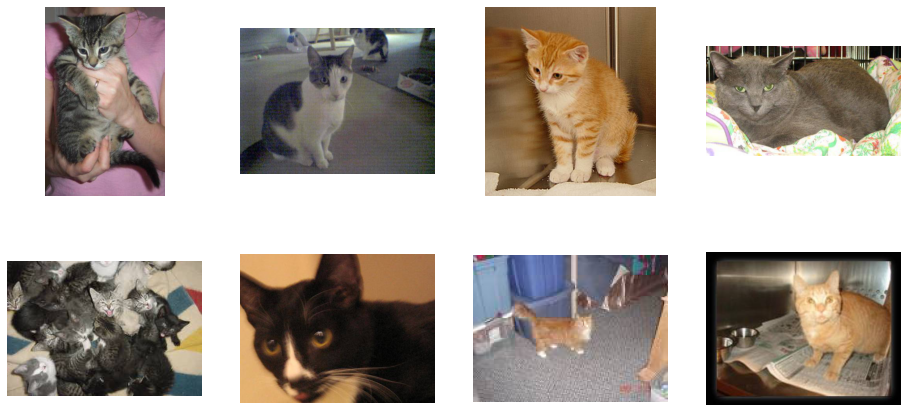

In [6]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4

pic_index = 0 # Índice para iterar sobre las imagenes

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[ pic_index-8:pic_index]
]

for i, img_path in enumerate(next_cat_pix):
   sp = plt.subplot(nrows, ncols, i + 1)
   sp.axis('Off') # no imprimir ejes
   img = mpimg.imread(img_path)
   plt.imshow(img)

plt.show()

In [0]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=1e-4),
   loss='binary_crossentropy',
   metrics = ['acc']
   )

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255. )
validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

In [11]:
train_generator = train_datagen.flow_from_directory(train_dir,
                  batch_size=20,
                  class_mode='binary',
                  target_size=(150, 150))

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                  batch_size=20,
                  class_mode = 'binary',
                  target_size = (150, 150))

test_generator = test_datagen.flow_from_directory(validation_dir,
                  batch_size=20,
                  class_mode = 'binary',
                  target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
batch_size = 20
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

print (steps_per_epoch)
print (validation_steps)

100
50


In [13]:
history = model.fit_generator(
             train_generator,
             steps_per_epoch= steps_per_epoch,
             epochs=5,
             validation_data=validation_generator,
             validation_steps= validation_steps,
             verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
100/100 - 101s - loss: 0.6879 - acc: 0.5395 - val_loss: 0.6716 - val_acc: 0.5450
Epoch 2/5
100/100 - 101s - loss: 0.6524 - acc: 0.6135 - val_loss: 0.6348 - val_acc: 0.6420
Epoch 3/5
100/100 - 101s - loss: 0.6115 - acc: 0.6680 - val_loss: 0.6125 - val_acc: 0.6600
Epoch 4/5
100/100 - 101s - loss: 0.5709 - acc: 0.7110 - val_loss: 0.6386 - val_acc: 0.6260
Epoch 5/5
100/100 - 101s - loss: 0.5434 - acc: 0.7265 - val_loss: 0.6583 - val_acc: 0.6350


In [14]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

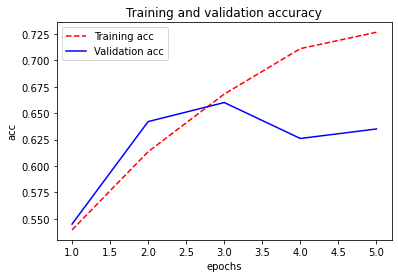

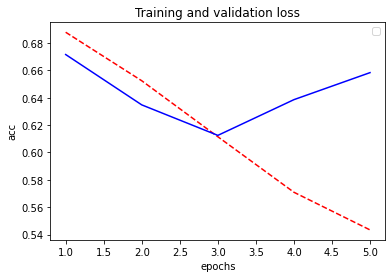

<Figure size 432x288 with 0 Axes>

In [15]:
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(1,len(acc)+1,1)

plt.plot ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and validation accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

plt.plot ( epochs,     loss, 'r--' )
plt.plot ( epochs, val_loss ,  'b' )
plt.title ('Training and validation loss'   )
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

In [17]:
test_lost, test_acc= model.evaluate(test_generator)
print ("Test Accuracy:", test_acc)

   3064/Unknown - 857s 280ms/step - loss: 0.6684 - acc: 0.6347

KeyboardInterrupt: ignored

Saving keras-tensorflow-jordi-torres-overfitting-6-242x300.png to keras-tensorflow-jordi-torres-overfitting-6-242x300 (3).png
[1.]


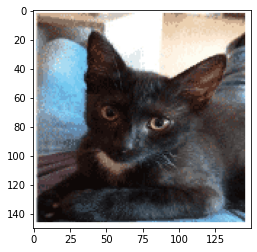

keras-tensorflow-jordi-torres-overfitting-6-242x300.png IS A DOG


In [23]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  plt.imshow(img)  
  plt.show()
  
  if classes[0]>0:
    print( fn + " IS A DOG")
    
  else:
    print( fn + " IS A CAT")